In [2]:
%config IPCompleter.greedy=True

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
flipkart_df = pd.read_csv("../data/cleaned_flipkart_df.csv")

# Visualize

In [4]:
pd=flipkart_df.product_category_tree.value_counts()
pd.to_frame().head()

,product_category_tree
Clothing,6197
Jewellery,3531
Footwear,1227
Mobiles & Accessories,1099
Automotive,1012


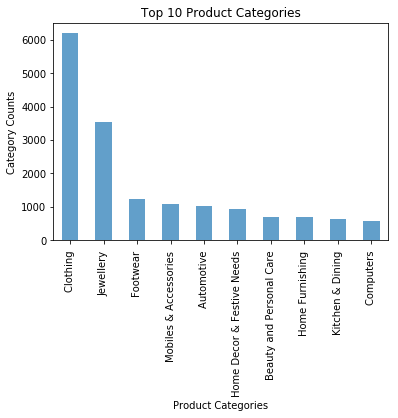

In [5]:
# Plot the top 10 categories having highest number of products
pd[:10].plot.bar(x=pd.index, y='product_category_tree',alpha=0.7)
_ = plt.title('Top 10 Product Categories')
_ = plt.xlabel('Product Categories')
_ = plt.ylabel('Category Counts')

In [6]:
viz = flipkart_df[['product_category_tree','retail_price','final_price','discounted_price']]
viz = viz.sort_values(by=['product_category_tree','discounted_price'],ascending=False)
viz.drop_duplicates(subset=['product_category_tree'], keep='first', inplace=True)
viz.sort_values(by=['discounted_price'],inplace=True,ascending=False)
viz.set_index('product_category_tree',inplace=True)

Text(0.5, 1.0, 'Top 10 discounted product categories')

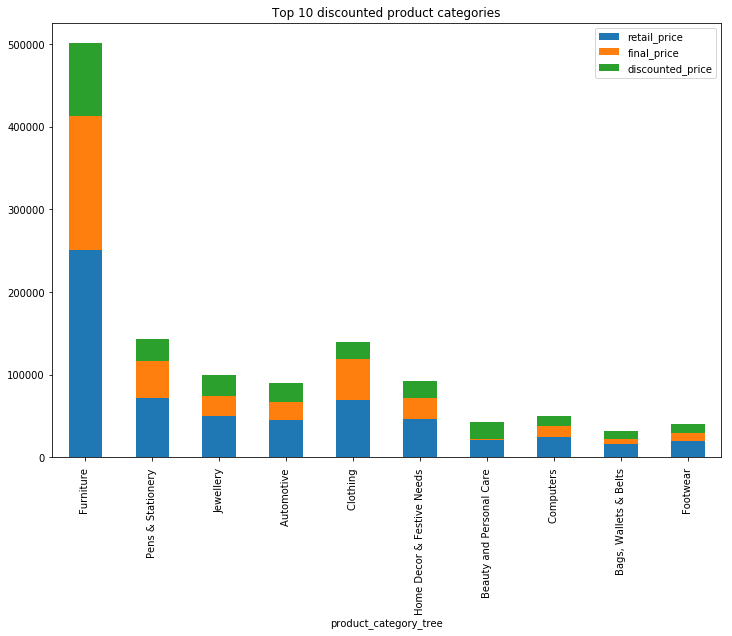

In [7]:
# Stacked bar graph comparing the retail, final and discount prices for 
# top 10 discounted product categories
_=plt.rcParams["figure.figsize"] = (12,8)
viz[:10].plot.bar(stacked=True)
plt.title('Top 10 discounted product categories')

Text(0.5, 1.0, 'Top 10 discounted product categories')

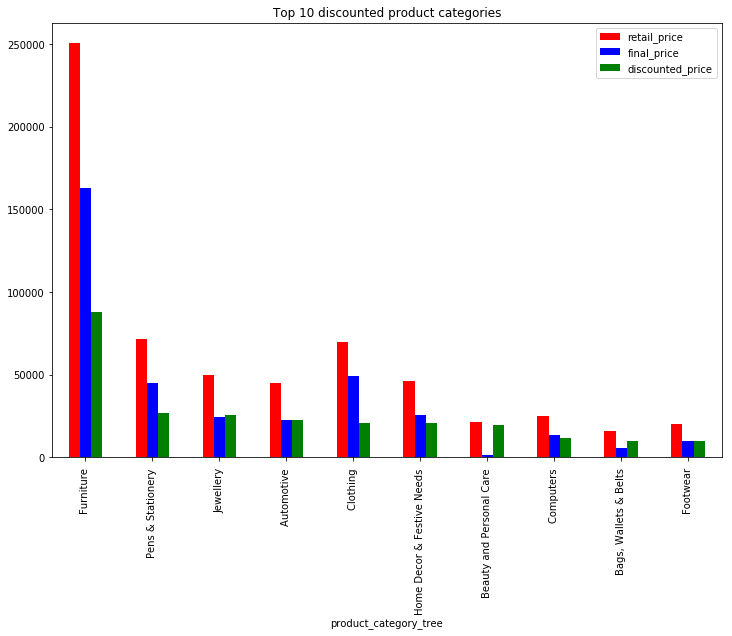

In [8]:
# Bar graph comparing the retail, final and discount prices for 
# top 10 discounted product categories
viz[:10].plot.bar(color=['red','blue','green'])
plt.title('Top 10 discounted product categories')

Text(0.5, 1.0, 'Top 4 categories - Retail prices comparision')

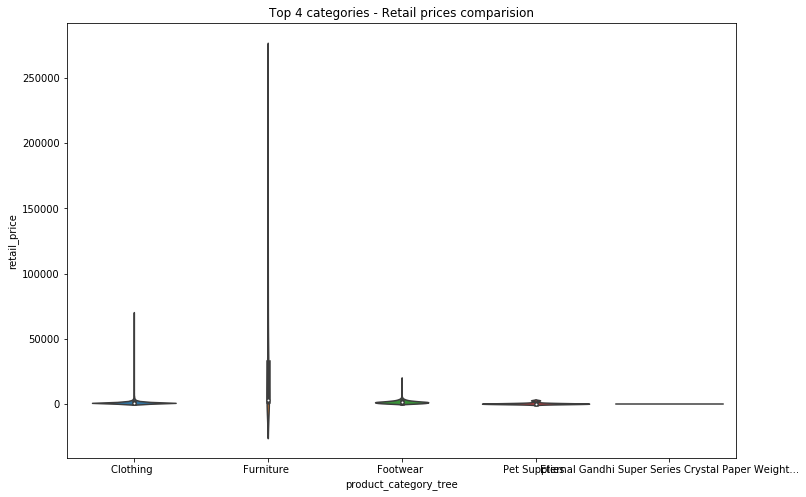

In [11]:
# Violin plot comparing the retail price for top 4 categories
import seaborn as sns
df=flipkart_df[flipkart_df.product_category_tree.isin(flipkart_df["product_category_tree"][0:9])][['product_category_tree','retail_price']]
df.product_category_tree.unique()
_ = sns.violinplot(x=df["product_category_tree"], y=df["retail_price"], data=df)
plt.title('Top 4 categories - Retail prices comparision')